Ouvrir ce notebook dans :
<a href="https://colab.research.google.com/github/joanglaunes/algosto/blob/master/python/exemple_SGD.ipynb" target="_blank">Google Colab</a>
ou
<a href="https://rosenblatt.ens.math-info.univ-paris5.fr/hub/user-redirect/git-pull?repo=https%3A%2F%2Fgithub.com%2Fjoanglaunes%2Falgosto&urlpath=tree%2Falgosto%2Fpython%2Fexemple_SGD.ipynb&branch=master" target="_blank">Rosenblatt</a>

Ce notebook est destiné à illustrer le chapitre sur la descente de gradient stochastique. On va tester et comparer sur un exemple simple, où tout est calculable explicitement, les 4 algorithmes suivants:
- la descente de gradient classique sur le coût théorique $J(w)=\mathbb{E}[f(X,w)]$
- la descente de gradient stochastique sur le coût théorique $J(w)=\mathbb{E}[f(X,w)]$
- la descente de gradient classique sur le coût empirique $J_x(w)=\frac1N\sum_{i=1}^Nf(x^i,w)$
- la descente de gradient stochastique sur le coût empirique $J_x(w)=\frac1N\sum_{i=1}^Nf(x^i,w)$

On suppose que $X$ est scalaire et suit la loi normale centrée réduite $N(0,1)$, et que $f(x,w)=(x-w)^2$. Dans cette situation, on peut vérifier facilement que
$$J(w)=w^2+1, \qquad\text{minimisé en }w^*=0,$$
$$J_x(w)=\frac1N\sum_{i=1}^N(x^i-w)^2, \qquad\text{minimisé en }w_x^*=\frac1N\sum_{i=1}^Nx^i.$$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# définition des fonctions coût et de leurs gradients:

def J(w):
    return 1+w**2

def gradJ(w):
    return 2*w

def Jx(w):
    return sum((x-w)**2)/N

def gradJx(w):
    return 2*(w-wx_opt)

In [ ]:
# On écrit une fonction générique pour la descente de gradient classique:
def GD(gradJ, w0, Niter):
    w = w0
    w_vals = np.zeros(Niter+1)
    w_vals[0] = w
    lbda = .5/N
    for t in range(Niter):
        w -= lbda * gradJ(w)
        w_vals[t+1] = w
    return w_vals

# qu'on spécifie dans les deux cas (descente sur J ou sur Jx):
GD_J = lambda w0, Niter : GD(gradJ, w0, Niter)
GD_Jx = lambda w0, Niter : GD(gradJx, w0, Niter)

# On écrit une fonction générique pour la descente de gradient stochastique.
# L'argument "randgen" est une fonction qui dicte comment est tiré au sort
# xt à chaque itération.
def SGD(w0, Niter, randgen):
    w = w0
    w_vals = np.zeros(Niter+1)
    w_vals[0] = w
    for t in range(Niter):
        xt = randgen()
        lbdat = 1/(1+t)
        w -= lbdat * 2*(w-xt)
        w_vals[t+1] = w
    return w_vals

# On spécifie dans les deux cas (descente sur J ou sur Jx):
# Pour la descente sur J, on tire au sort suivant la loi N(0,1):
SGD_J = lambda w0, Niter : SGD(w0, Niter, lambda : np.random.randn(1).item())
# Pour la descente sur Jx, on tire au sort un des xi:
SGD_Jx = lambda w0, Niter : SGD(w0, Niter, lambda : x[np.random.randint(N)])

Notons qu'on a divisé par N le pas de descente 1/2 de la descente de gradient classique. En fait comme expliqué dans le cours, plutôt que de comparer en terme de nombre d'itérations, il convient de comparer en termes de nombre d'opérations effectuées. Or, sur le coût empirique, une itération de gradient classique nécessite N fois plus d'opérations qu'une itération de gradient stochastique. Par conséquent, on ralentit artificiellement les descentes de gradient classique pour mieux représenter l'évolution en termes de coût de calcul.

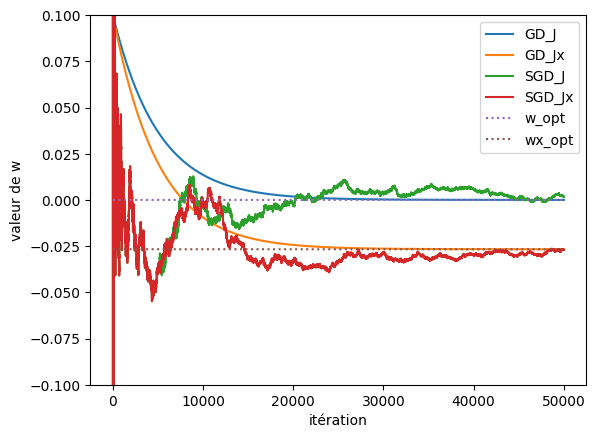

In [ ]:
# On construit les données, on fixe les paramètres et on effectue les 4 descentes:
N = 5000
x = np.random.randn(N)
w_opt = 0
wx_opt = sum(x)/N
w0 = .1
Niter = 50000
w_GD_J = GD_J(w0, Niter)
w_GD_Jx = GD_Jx(w0, Niter)
w_SGD_J = SGD_J(w0, Niter)
w_SGD_Jx = SGD_Jx(w0, Niter)

# Affichage des résultats
plt.plot(w_GD_J)
plt.plot(w_GD_Jx)
plt.plot(w_SGD_J)
plt.plot(w_SGD_Jx)
plt.plot(np.ones(Niter+1)*w_opt,":")
plt.plot(np.ones(Niter+1)*wx_opt,":")
plt.legend(["GD_J","GD_Jx","SGD_J","SGD_Jx","w_opt","wx_opt"])
plt.ylim([-.1,.1])
plt.xlabel("itération")
plt.ylabel("valeur de w")
plt.show()